In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Set up
api_key = 'A6SW783D1J14L2Y3'
symbol = 'COST'

# Calculate dynamic start date (5 years ago from today)
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)
start_str = start_date.strftime('%Y-%m-%d')

# API call
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}'
response = requests.get(url)
data = response.json()

# Parse and filter
if 'Time Series (Daily)' in data:
    daily_data = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(daily_data, orient='index')
    df = df.rename(columns={
        '1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume'
    })
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.index.name = 'Date'
    df = df.apply(pd.to_numeric)
    
    # Filter to last 5 years
    df = df.loc[df.index >= start_str]
else:
    print("Error or no data found:", data)

df


,open,high,low,close,volume
Date,,,,,
2020-06-08,310.66,311.2900,306.4600,307.19,3764466
2020-06-09,307.50,308.6000,305.1700,305.55,3155845
2020-06-10,306.48,308.6300,305.6500,307.33,2713706
2020-06-11,306.99,309.2000,300.6400,300.83,3443012
2020-06-12,302.67,305.1500,296.2500,298.70,4020006
...,...,...,...,...,...
2025-06-02,1034.27,1060.5000,1034.2700,1056.85,2148004
2025-06-03,1054.15,1067.0800,1043.2552,1055.59,1992850
2025-06-04,1055.00,1057.8299,1049.3700,1051.69,1422086


In [3]:
df = df.reset_index()
df.head()

,Date,open,high,low,close,volume
0,2020-06-08,310.66,311.29,306.46,307.19,3764466
1,2020-06-09,307.50,308.60,305.17,305.55,3155845
2,2020-06-10,306.48,308.63,305.65,307.33,2713706
3,2020-06-11,306.99,309.20,300.64,300.83,3443012
4,2020-06-12,302.67,305.15,296.25,298.70,4020006


In [4]:
df = df.drop(['Date'], axis = 1)
df.head()

,open,high,low,close,volume
0,310.66,311.29,306.46,307.19,3764466
1,307.50,308.60,305.17,305.55,3155845
2,306.48,308.63,305.65,307.33,2713706
3,306.99,309.20,300.64,300.83,3443012
4,302.67,305.15,296.25,298.70,4020006


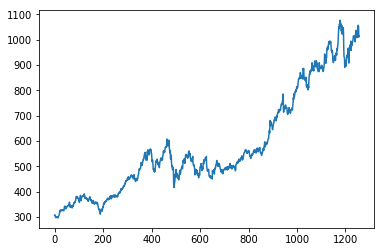

In [ ]:
plt.plot(df.close)

In [ ]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1252    983.6915
1253    985.0337
1254    986.2769
1255    987.0156
1256    987.9180
Name: close, Length: 1257, dtype: float64

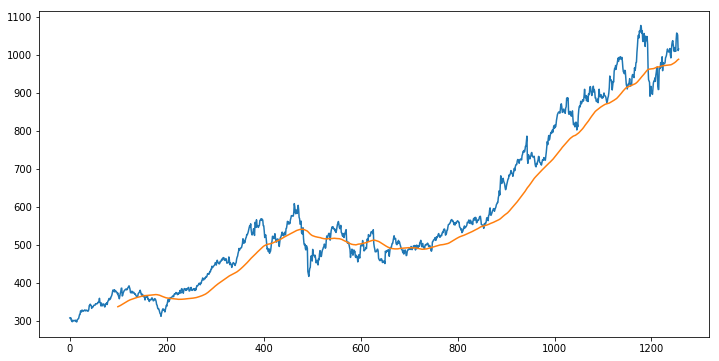

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100)

In [ ]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1252    949.63930
1253    950.60370
1254    951.47540
1255    952.17650
1256    952.88945
Name: close, Length: 1257, dtype: float64

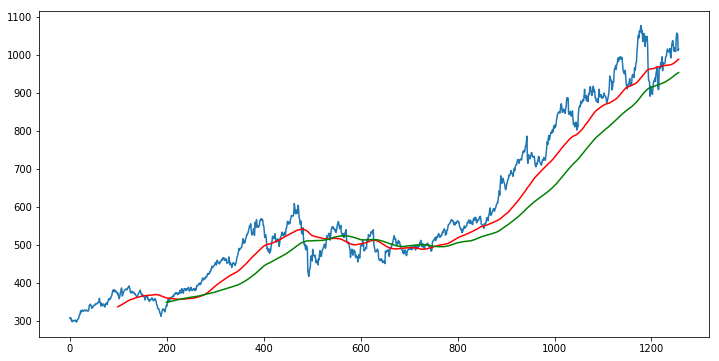

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(1257, 5)

In [ ]:
# Splitting Data into Training and Testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['close']], test_size=0.30, shuffle=False)

print(train.shape)
print(test.shape)

/Users/nicholastam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


(879, 1)
(378, 1)


In [ ]:
train.head()

,close
0,307.19
1,305.55
2,307.33
3,300.83
4,298.70


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(train)
data_training_array

array([[0.0341263 ],
       [0.02886128],
       [0.03457575],
       [0.01370831],
       [0.0068702 ],
       [0.00199043],
       [0.0154098 ],
       [0.00979165],
       [0.00966323],
       [0.01072266],
       [0.01248836],
       [0.01518508],
       [0.00468715],
       [0.01274519],
       [0.        ],
       [0.01614819],
       [0.021349  ],
       [0.02629298],
       [0.02947125],
       [0.04793091],
       [0.06314809],
       [0.06343703],
       [0.09303669],
       [0.09525185],
       [0.08462551],
       [0.10093422],
       [0.09676073],
       [0.09538027],
       [0.09062891],
       [0.09615076],
       [0.10009952],
       [0.10189733],
       [0.09486661],
       [0.09380718],
       [0.09965007],
       [0.09955376],
       [0.09496292],
       [0.09072522],
       [0.09300459],
       [0.10517192],
       [0.13878455],
       [0.13936242],
       [0.15008507],
       [0.14238017],
       [0.13945873],
       [0.11515618],
       [0.12905711],
       [0.125

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (xtrain.shape[1],1)))